# This program is the implementation of Machine Learning and Deep Learning Techniques such as: Logistic Regression, Decision Tree, Random Forest, SVM, and DNN methods with MinMax Normalization ([0,1]-Normalizaton)
# All right reserved by Delowar Hossain, E-mail: delowar_cse_ru@yahoo.com

In [1]:
# This code is the original code with 100 epochs for TP1
# with Logistic Regression, DNN, Decision Tree, Random Forest, and SVM methods
# ROC Curve together
# This version is clean on and created on August 18, 2020

In [2]:
# Import necessary dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import model_evaluation_utils as meu
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

%matplotlib inline

# Load and merge datasets # white = control; red = stroke; wine = data
stroke_data = pd.read_csv('Stroke/Injure participants.csv', delim_whitespace=False)
control_data = pd.read_csv('Healthy Control participants.csv', delim_whitespace=False)

# Data type as an attribute
stroke_data['data_type'] = 'stroke'   
control_data['data_type'] = 'control'

# merge control and stroke data
datas = pd.concat([stroke_data, control_data])
datas = datas.sample(frac=1, random_state=42).reset_index(drop=True)

# understand dataset features and values
datas.head()
#stroke_data.head()
#control_data.head()

,Abs error X,Abs error Y,Abs error XY,Variability X,Variability Y,Variability XY,Contraction expansion ratio X,Contraction expansion ratio Y,Contraction expansion ratio XY,Shift X,Shift Y,Shift XY,Task Score,data_type
0,-0.655069,-1.595675,-1.238965,-0.632909,-1.305108,-0.869893,-0.201238,0.243281,0.075277,-0.576372,0.156761,-0.427542,0.015397,control
1,0.891985,1.857968,1.380032,1.265856,3.083174,1.810506,-2.026350,-0.562740,-1.633751,0.993840,3.030375,0.981829,3.812868,stroke
2,1.924400,4.210700,3.601400,3.459100,4.531100,3.795800,-4.327700,-7.314200,-4.554200,-1.379200,-6.560600,2.874300,5.673200,stroke
3,-1.006990,0.417151,-0.550243,0.050287,0.491995,0.122328,-0.330798,0.391511,0.052952,0.430481,1.677575,-0.302786,0.596315,control
4,1.310648,0.108955,0.991658,0.486618,-0.105091,0.384574,0.274672,-1.727270,-0.573007,1.731097,-0.230371,1.090592,1.172699,control


In [3]:
# Prepare Training and Testing Datasets
stp_features = datas.iloc[:,:-1]
stp_feature_names = stp_features.columns
stp_class_labels = np.array(datas['data_type'])

stp_train_X, stp_test_X, stp_train_y, stp_test_y = train_test_split(stp_features, stp_class_labels, 
                                                                    test_size=0.3, random_state=42)

print(Counter(stp_train_y), Counter(stp_test_y))
print('Features:', list(stp_feature_names))

Counter({'stroke': 379, 'control': 331}) Counter({'stroke': 171, 'control': 134})
Features: ['Abs error X', 'Abs error Y', 'Abs error XY', 'Variability X', 'Variability Y', 'Variability XY', 'Contraction expansion ratio X', 'Contraction expansion ratio Y', 'Contraction expansion ratio XY', 'Shift X', 'Shift Y', 'Shift XY', 'Task Score']


In [4]:
# Feature Scaling
# Define the scaler 
#stp_ss = StandardScaler().fit(stp_train_X)
stp_ss = stp_train_X

# Scale the train set
#stp_train_SX = stp_ss.transform(stp_train_X)
stp_train_SX = stp_train_X

# Scale the test set
#stp_test_SX = stp_ss.transform(stp_test_X)
stp_test_SX = stp_test_X

In [5]:
# Encode Response class labels
le = LabelEncoder()
le.fit(stp_train_y)
# encode wine type labels
stp_train_ey = le.transform(stp_train_y)
stp_test_ey = le.transform(stp_test_y)

### Train a Model using Logistic Regression

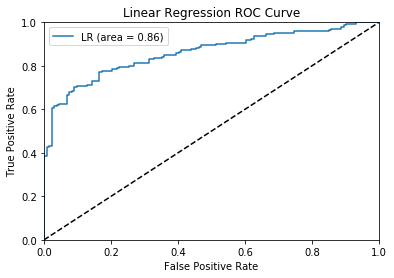

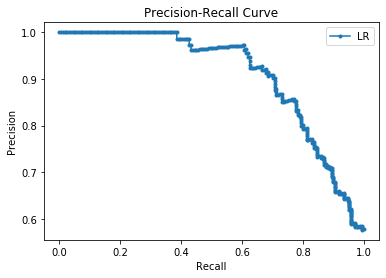

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from matplotlib import pyplot
import matplotlib.pyplot as plt

stp_lr = LogisticRegression()
stp_lr.fit(stp_train_SX, stp_train_y)

y_pred_lr = stp_lr.predict(stp_test_SX)
y_pred_prob_lr = stp_lr.predict_proba(stp_test_SX)[:,1]

fpr_lr, tpr_lr, thresholds_lr = roc_curve(stp_test_ey, y_pred_prob_lr)

# AUC value can also be calculated like this.
auc_lr = auc(fpr_lr, tpr_lr)
#print(auc_lr)

fig = plt.figure(1)
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_lr, tpr_lr, label='LR (area = {:.2f})'.format(auc_lr))
#plt.plot(fpr_rf, tpr_rf, label='RF (area = {:.3f})'.format(auc_rf)) # wtp_lr, wtp_test_SX, wtp_test_y
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Linear Regression ROC Curve')
plt.legend(loc='best')
plt.show()
#fig.savefig('LR ROC Curve.png', bbox_inches='tight')

# calculate precision and recall for each threshold
lr_precision, lr_recall, _ = precision_recall_curve(stp_test_ey, y_pred_prob_lr)
# calculate scores
#lr_f1, lr_auc = f1_score(wtp_test_ey, y_pred_prob_lr), auc(lr_recall, lr_precision)
plt.figure(2)
pyplot.plot(lr_recall, lr_precision, marker='.', label='LR')
# summarize scores
#print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# axis labels
fig = plt.figure(2)
pyplot.title('Precision-Recall Curve')
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()
#fig.savefig('LR Precision-Recall Curve.png', bbox_inches='tight')

In [7]:
# Predict and Evaluate Model Performance
stp_lr_predictions = stp_lr.predict(stp_test_SX)
#print(wtp_lr_predictions)
meu.display_model_performance_metrics(true_labels=stp_test_y, predicted_labels=stp_lr_predictions, 
                                      classes=['stroke', 'control'])

Model Performance metrics:
------------------------------
Accuracy: 0.7902
Precision: 0.8149
Recall: 0.7902
F1 Score: 0.7901

Model Classification report:
------------------------------
              precision    recall  f1-score   support

      stroke       0.90      0.70      0.79       171
     control       0.70      0.90      0.79       134

    accuracy                           0.79       305
   macro avg       0.80      0.80      0.79       305
weighted avg       0.81      0.79      0.79       305


Prediction Confusion Matrix:
------------------------------
                Predicted:        
                    stroke control
Actual: stroke         120      51
        control         13     121


/Users/delowarhossain/Desktop/Research/TesorflowProgramming/Stroke-Data/model_evaluation_utils.py:67: FutureWarning: the 'labels' keyword is deprecated, use 'codes' instead
  labels=level_labels),
/Users/delowarhossain/Desktop/Research/TesorflowProgramming/Stroke-Data/model_evaluation_utils.py:69: FutureWarning: the 'labels' keyword is deprecated, use 'codes' instead
  labels=level_labels))


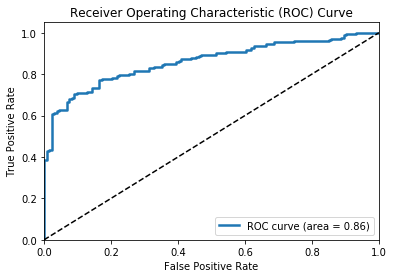

In [8]:
# View model ROC curve
meu.plot_model_roc_curve(stp_lr, stp_test_SX, stp_test_y)

### Train a Model using Deep Learning (MLP)

In [9]:
# Encode Response class labels
le = LabelEncoder()
le.fit(stp_train_y)
# encode wine type labels
stp_train_ey = le.transform(stp_train_y)
stp_test_ey = le.transform(stp_test_y)

In [12]:
# Build & Compile DNN Model Architecture
from keras.models import Sequential
from keras.layers import Dense

stp_dnn_model = Sequential()
stp_dnn_model.add(Dense(16, activation='relu', input_shape=(13,)))
stp_dnn_model.add(Dense(16, activation='relu'))
stp_dnn_model.add(Dense(16, activation='relu'))
stp_dnn_model.add(Dense(1, activation='sigmoid'))

stp_dnn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [13]:
# Train the Model
history = stp_dnn_model.fit(stp_train_SX, stp_train_ey, epochs=100, batch_size=5, 
                            shuffle=True, validation_split=0.1, verbose=1)

Epoch 1/100
128/128 [==============================] - 0s 2ms/step - loss: 0.5609 - accuracy: 0.6166 - val_loss: 0.5680 - val_accuracy: 0.7324
Epoch 2/100
128/128 [==============================] - 0s 1ms/step - loss: 0.4879 - accuracy: 0.7872 - val_loss: 0.5152 - val_accuracy: 0.7606
Epoch 3/100
128/128 [==============================] - 0s 1ms/step - loss: 0.4443 - accuracy: 0.7966 - val_loss: 0.4871 - val_accuracy: 0.7606
Epoch 4/100
128/128 [==============================] - 0s 1ms/step - loss: 0.4282 - accuracy: 0.8075 - val_loss: 0.4827 - val_accuracy: 0.7606
Epoch 5/100
128/128 [==============================] - 0s 1ms/step - loss: 0.4195 - accuracy: 0.8075 - val_loss: 0.4803 - val_accuracy: 0.7746
Epoch 6/100
128/128 [==============================] - 0s 1ms/step - loss: 0.4133 - accuracy: 0.8185 - val_loss: 0.4618 - val_accuracy: 0.8028
Epoch 7/100
128/128 [==============================] - 0s 1ms/step - loss: 0.4087 - accuracy: 0.8232 - val_loss: 0.4611 - val_accuracy: 0.7606

Epoch 58/100
128/128 [==============================] - 0s 1ms/step - loss: 0.2562 - accuracy: 0.8764 - val_loss: 0.5133 - val_accuracy: 0.8028
Epoch 59/100
128/128 [==============================] - 0s 1ms/step - loss: 0.2502 - accuracy: 0.8920 - val_loss: 0.5144 - val_accuracy: 0.7887
Epoch 60/100
128/128 [==============================] - 0s 1ms/step - loss: 0.2455 - accuracy: 0.8858 - val_loss: 0.5276 - val_accuracy: 0.8028
Epoch 61/100
128/128 [==============================] - 0s 1ms/step - loss: 0.2439 - accuracy: 0.8920 - val_loss: 0.5215 - val_accuracy: 0.7887
Epoch 62/100
128/128 [==============================] - 0s 1ms/step - loss: 0.2414 - accuracy: 0.8967 - val_loss: 0.4903 - val_accuracy: 0.8028
Epoch 63/100
128/128 [==============================] - 0s 1ms/step - loss: 0.2427 - accuracy: 0.8889 - val_loss: 0.5322 - val_accuracy: 0.7606
Epoch 64/100
128/128 [==============================] - 0s 1ms/step - loss: 0.2401 - accuracy: 0.9030 - val_loss: 0.5309 - val_accuracy:

In [14]:
# Predict on Test dataset
stp_dnn_ypred = stp_dnn_model.predict_classes(stp_test_SX)
stp_dnn_ypred_prob = stp_dnn_model.predict_proba(stp_test_SX)
stp_dnn_predictions = le.inverse_transform(stp_dnn_ypred)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
Instructions for updating:
Please use `model.predict()` instead.


/Users/delowarhossain/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


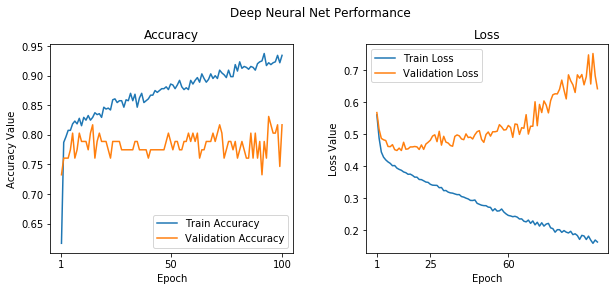

<Figure size 432x288 with 0 Axes>

In [15]:
# Evaluate Model Performance
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
t = f.suptitle('Deep Neural Net Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epochs = list(range(1,101))
fig = plt.figure(1)
ax1.plot(epochs, history.history['accuracy'], label='Train Accuracy')
ax1.plot(epochs, history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks([1,50,100])#ax1.set_xticks(epochs)
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")
#fig.savefig('DNN Accuracy Curve.png', bbox_inches='tight')

fig = plt.figure(2)
ax2.plot(epochs, history.history['loss'], label='Train Loss')
ax2.plot(epochs, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks([1,25,60])#ax2.set_xticks(epochs)
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")
#fig.savefig('DNN Loss Curve.png', bbox_inches='tight')

In [16]:
meu.display_model_performance_metrics(true_labels=stp_test_y, predicted_labels=stp_dnn_predictions, 
                                      classes=['stroke', 'control'])

Model Performance metrics:
------------------------------
Accuracy: 0.7475
Precision: 0.7766
Recall: 0.7475
F1 Score: 0.7468

Model Classification report:
------------------------------
              precision    recall  f1-score   support

      stroke       0.87      0.65      0.74       171
     control       0.66      0.87      0.75       134

    accuracy                           0.75       305
   macro avg       0.76      0.76      0.75       305
weighted avg       0.78      0.75      0.75       305


Prediction Confusion Matrix:
------------------------------
                Predicted:        
                    stroke control
Actual: stroke         111      60
        control         17     117


/Users/delowarhossain/Desktop/Research/TesorflowProgramming/Stroke-Data/model_evaluation_utils.py:67: FutureWarning: the 'labels' keyword is deprecated, use 'codes' instead
  labels=level_labels),
/Users/delowarhossain/Desktop/Research/TesorflowProgramming/Stroke-Data/model_evaluation_utils.py:69: FutureWarning: the 'labels' keyword is deprecated, use 'codes' instead
  labels=level_labels))


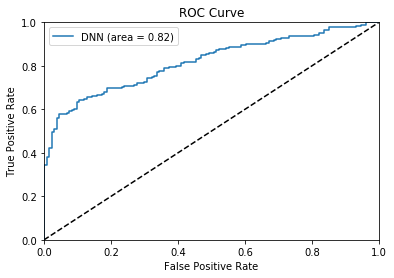

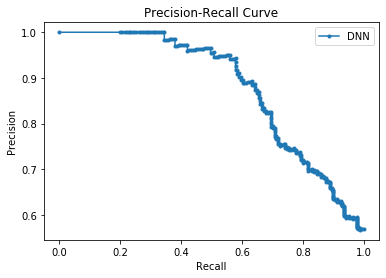

In [17]:
# https://www.dlology.com/blog/simple-guide-on-how-to-generate-roc-plot-for-keras-classifier/
from sklearn.metrics import roc_curve
#y_pred_dnn = wtp_dnn_model.predict(wtp_test_X).ravel()
fpr_dnn, tpr_dnn, thresholds_dnn = roc_curve(stp_test_ey, stp_dnn_ypred_prob)

# AUC value can also be calculated like this.
from sklearn.metrics import auc
auc_dnn = auc(fpr_dnn, tpr_dnn)

fig = plt.figure(1)
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_dnn, tpr_dnn, label='DNN (area = {:.2f})'.format(auc_dnn))
#plt.plot(fpr_rf, tpr_rf, label='RF (area = {:.3f})'.format(auc_rf)) # wtp_lr, wtp_test_SX, wtp_test_y
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()
#fig.savefig('DNN ROC Curve.png', bbox_inches='tight')

# calculate precision and recall for each threshold
dnn_precision, dnn_recall, _ = precision_recall_curve(stp_test_ey, stp_dnn_ypred_prob)
# calculate scores
#lr_f1, lr_auc = f1_score(wtp_test_ey, y_pred_prob_lr), auc(lr_recall, lr_precision)
fig = plt.figure(2)
pyplot.plot(dnn_recall, dnn_precision, marker='.', label='DNN')
# summarize scores
#print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# axis labels
pyplot.title('Precision-Recall Curve')
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()
#fig.savefig('DNN Precision-Recall Curve.png', bbox_inches='tight')

[13/13] features ████████████████████ Time elapsed: 0 seconds

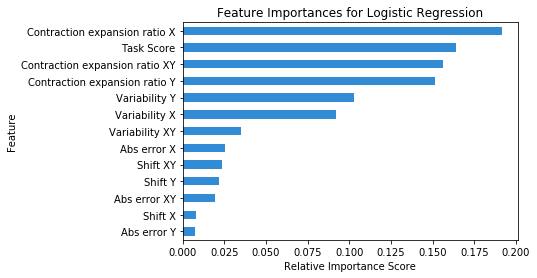

In [18]:
# Model Interpretation
# View Feature importances
from skater.core.explanations import Interpretation
from skater.model import InMemoryModel

stp_interpreter = Interpretation(stp_test_SX, feature_names=stp_features.columns)
stp_im_model = InMemoryModel(stp_lr.predict_proba, examples=stp_train_SX, target_names=stp_lr.classes_)
plots = stp_interpreter.feature_importance.plot_feature_importance(stp_im_model, ascending=False)
plt.xlabel('Relative Importance Score')
plt.ylabel('Feature')
plt.title('Feature Importances for Logistic Regression')
fig = plt.figure(1)
#fig.savefig('LR Feature Importance.png', bbox_inches='tight')

In [23]:
print(stp_test_SX)

      Abs error X  Abs error Y  Abs error XY  Variability X  Variability Y  \
752      0.127372     0.040152      0.007393       0.470772       0.882473   
519      0.722740     0.069738      0.507440       0.699180      -0.108660   
210      1.567400     2.897400      2.505300       2.713200       5.169000   
611     -0.271770    -0.293400     -0.456910      -0.425300       0.233240   
914      2.383200     2.141400      2.745300       2.780900       3.943800   
...           ...          ...           ...            ...            ...   
1004     0.258178     0.178299      0.205598       0.891443       0.702740   
227      2.643546     1.706141      2.752842       4.299890       4.128796   
868      0.183693    -1.336939     -0.317707       0.403493      -0.336027   
584      0.477500    -0.755980      0.148450      -0.629630      -0.505810   
808     -0.945659    -0.786053     -1.143786      -0.485494      -0.695363   

      Variability XY  Contraction expansion ratio X  \
752     

In [19]:
# Visualize Model Decision Surface
feature_indices = [i for i, feature in enumerate(stp_feature_names) 
                       if feature in ['Abs error XY', 'Variability Y']]

meu.plot_model_decision_surface(clf=stp_lr, train_features=stp_train_SX[:, feature_indices], 
                                train_labels=stp_train_y, plot_step=0.01, cmap=plt.cm.Wistia_r,
                                markers=[',', 'o'], alphas=[0.9, 0.6], colors=['r', 'b'])
#fig = plt.figure(1)
#fig.savefig('Visualize Model Decision Surface')

TypeError: '(slice(None, None, None), [2, 4])' is an invalid key

# Predicting Data Quality

In [20]:
# Predicting Data Quality

# Prepare Training and Testing Datasets
sqp_features = datas.iloc[:,:-1]
sqp_class_labels = np.array(datas['Abs error XY'])
sqp_label_names = ['low', 'medium', 'high']
sqp_feature_names = stp_features.columns
sqp_class_labels = np.array(datas['data_type'])

sqp_train_X, sqp_test_X, sqp_train_y, sqp_test_y = train_test_split(sqp_features, sqp_class_labels, 
                                                                    test_size=0.3, random_state=42)

print(Counter(sqp_train_y), Counter(sqp_test_y))
print('Features:', list(stp_feature_names))

Counter({'stroke': 379, 'control': 331}) Counter({'stroke': 171, 'control': 134})
Features: ['Abs error X', 'Abs error Y', 'Abs error XY', 'Variability X', 'Variability Y', 'Variability XY', 'Contraction expansion ratio X', 'Contraction expansion ratio Y', 'Contraction expansion ratio XY', 'Shift X', 'Shift Y', 'Shift XY', 'Task Score']


In [21]:
# Feature Scaling

# Define the scaler 
#sqp_ss = StandardScaler().fit(sqp_train_X)
sqp_ss = sqp_train_X

# Scale the train set
#sqp_train_SX = sqp_ss.transform(sqp_train_X)
sqp_train_SX = sqp_train_X

# Scale the test set
#sqp_test_SX = sqp_ss.transform(sqp_test_X)
sqp_test_SX = sqp_test_X

### Train, Predict & Evaluate Model using Decision Tree

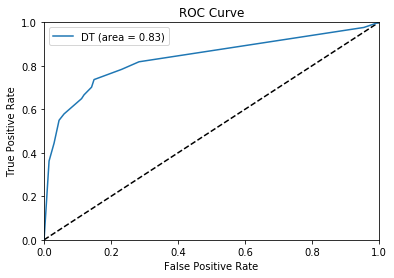

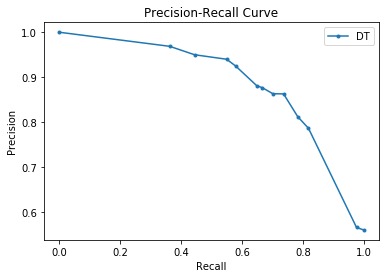

In [22]:
# https://www.dlology.com/blog/simple-guide-on-how-to-generate-roc-plot-for-keras-classifier/
# Train, Predict & Evaluate Model using Decision Tree

from sklearn.tree import DecisionTreeClassifier

stp_dt = DecisionTreeClassifier(max_depth=4) # max_depth=4 gives us best result
stp_dt.fit(sqp_train_SX, sqp_train_y)

y_pred_dt = stp_dt.predict(stp_test_SX)
y_pred_prob_dt = stp_dt.predict_proba(stp_test_SX)[:,1]

fpr_dt, tpr_dt, thresholds_dt = roc_curve(stp_test_ey, y_pred_prob_dt)

# AUC value can also be calculated like this.
from sklearn.metrics import auc
auc_dt = auc(fpr_dt, tpr_dt)
#print(auc_dt)


plt.xlim(0, 1)
plt.ylim(0, 1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_dt, tpr_dt, label='DT (area = {:.2f})'.format(auc_dt))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()
#fig.savefig('DT ROC Curve.png', bbox_inches='tight')

# calculate precision and recall for each threshold
dt_precision, dt_recall, _ = precision_recall_curve(stp_test_ey, y_pred_prob_dt)
# calculate scores
#lr_f1, lr_auc = f1_score(wtp_test_ey, y_pred_prob_lr), auc(lr_recall, lr_precision)
fig = plt.figure(2)
pyplot.plot(dt_recall, dt_precision, marker='.', label='DT')
# summarize scores
#print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# axis labels
pyplot.title('Precision-Recall Curve')
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()
#fig.savefig('DT Precision-Recall Curve.png', bbox_inches='tight')

In [ ]:
#### Train, Predict & Evaluate Model using Decision Tree

from sklearn.tree import DecisionTreeClassifier

sqp_dt = DecisionTreeClassifier(max_depth=4)
sqp_dt.fit(sqp_train_SX, sqp_train_y)

sqp_dt_predictions = sqp_dt.predict(sqp_test_SX)

meu.display_model_performance_metrics(true_labels=sqp_test_y, predicted_labels=sqp_dt_predictions, 
                                      classes=['stroke', 'control'])#classes=stp_class_labels)

In [ ]:
# View Model ROC Curve
meu.plot_model_roc_curve(sqp_dt, sqp_test_SX, sqp_test_y)

In [ ]:
# View Feature Importances from Decision Tree Model
sqp_dt_feature_importances = sqp_dt.feature_importances_
sqp_dt_feature_names, sqp_dt_feature_scores = zip(*sorted(zip(sqp_feature_names, sqp_dt_feature_importances), 
                                                          key=lambda x: x[1]))
y_position = list(range(len(sqp_dt_feature_names)))
fig = plt.figure(1)
plt.barh(y_position, sqp_dt_feature_scores, height=0.6, align='center')
plt.yticks(y_position , sqp_dt_feature_names)
plt.xlabel('Relative Importance Score')
plt.ylabel('Feature')
t = plt.title('Feature Importances for Decision Tree')
#fig.savefig('DT Feature Importance.png', bbox_inches='tight')

In [ ]:
# Visualize the Decision Tree

from graphviz import Source
from sklearn import tree
from IPython.display import Image

graph = Source(tree.export_graphviz(sqp_dt, out_file=None, class_names=stp_class_labels,
                                    filled=True, rounded=True, special_characters=False,
                                    feature_names=sqp_feature_names, max_depth=4))
png_data = graph.pipe(format='png')
with open('dtree_structure.png','wb') as f:
    f.write(png_data)

Image(png_data)

### Train, Predict & Evaluate Model using Random Forests

In [ ]:
# https://www.dlology.com/blog/simple-guide-on-how-to-generate-roc-plot-for-keras-classifier/
# Train, Predict & Evaluate Model using Random Forests
from sklearn.ensemble import RandomForestClassifier
# train the model
stp_rf = RandomForestClassifier()
stp_rf.fit(sqp_train_SX, sqp_train_y)

y_pred_rf = stp_rf.predict(stp_test_SX)
y_pred_prob_rf = stp_rf.predict_proba(stp_test_SX)[:,1]

fpr_rf, tpr_rf, thresholds_rf = roc_curve(stp_test_ey, y_pred_prob_rf)

# AUC value can also be calculated like this.
from sklearn.metrics import auc
auc_rf = auc(fpr_rf, tpr_rf)
#print(auc_rf)

fig = plt.figure(1)
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf, tpr_rf, label='RF (area = {:.2f})'.format(auc_rf))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()
#fig.savefig('RF ROC Curve.png', bbox_inches='tight')

# calculate precision and recall for each threshold
rf_precision, rf_recall, _ = precision_recall_curve(stp_test_ey, y_pred_prob_rf)
# calculate scores
#lr_f1, lr_auc = f1_score(stp_test_ey, y_pred_prob_lr), auc(lr_recall, lr_precision)
fig = plt.figure(2)
pyplot.plot(rf_recall, rf_precision, marker='.', label='RF')
# summarize scores
#print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# axis labels
pyplot.title('Precision-Recall Curve')
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()
#fig.savefig('RF Precision-Recall Curve.png', bbox_inches='tight')

In [ ]:
# Plot all ROC curve together
plt.figure(1)
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_lr, tpr_lr, label='LR (area = {:.2f})'.format(auc_lr))
plt.plot(fpr_dnn, tpr_dnn, label='DNN (area = {:.2f})'.format(auc_dnn))
plt.plot(fpr_dt, tpr_dt, label='DT (area = {:.2f})'.format(auc_dt))
plt.plot(fpr_rf, tpr_rf, label='RF (area = {:.2f})'.format(auc_rf)) 
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [ ]:
# Plot all Precision-Recall curve all together
plt.figure(1)
#plt.xlim(0, 1)
#plt.ylim(0, 1)
#plt.plot([0, 1], [0, 1], 'k--')
plt.plot(lr_precision, lr_recall, label='LR')
plt.plot(dnn_precision, dnn_recall, label='DNN')
plt.plot(dt_precision, dt_recall, label='DT')
plt.plot(rf_precision, rf_recall, label='RF') 
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')
plt.show()

In [ ]:
# Train, Predict & Evaluate Model using Random Forests
from sklearn.ensemble import RandomForestClassifier
# train the model
sqp_rf = RandomForestClassifier()
sqp_rf.fit(sqp_train_SX, sqp_train_y)
# predict and evaluate performance
sqp_rf_predictions = sqp_rf.predict(sqp_test_SX)
meu.display_model_performance_metrics(true_labels=sqp_test_y, predicted_labels=sqp_rf_predictions, 
                                      classes=['stroke', 'control'])#classes=sqp_label_names)

In [ ]:
# View Model ROC Curve
meu.plot_model_roc_curve(sqp_rf, sqp_test_SX, sqp_test_y)

### Hyperparameter tuning with Grid Search & Cross Validation

In [ ]:
# Hyperparameter tuning with Grid Search & Cross Validation
print(sqp_rf.get_params())

In [ ]:
# Get the best hyperparameter values
from sklearn.model_selection import GridSearchCV

param_grid = {
                'n_estimators': [100, 200, 300, 500], 
                'max_features': ['auto', None, 'log2']    
              }

sqp_clf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5,
                       scoring='accuracy')
sqp_clf.fit(sqp_train_SX, sqp_train_y)
print(sqp_clf.best_params_)

In [ ]:
# View grid search results
results = sqp_clf.cv_results_
for param, score_mean, score_sd in zip(results['params'], results['mean_test_score'], results['std_test_score']):
    print(param, round(score_mean, 4), round(score_sd, 4))

### Train, Predict & Evaluate Random Forest Model with tuned hyperparameters

In [ ]:
# Train, Predict & Evaluate Random Forest Model with tuned hyperparameters
sqp_rft = RandomForestClassifier(n_estimators=200, max_features='auto', random_state=42)
sqp_rft.fit(sqp_train_SX, sqp_train_y)

sqp_rft_predictions = sqp_rft.predict(sqp_test_SX)
meu.display_model_performance_metrics(true_labels=sqp_test_y, predicted_labels=sqp_rft_predictions, 
                                      classes=['stroke', 'control'])#classes=sqp_label_names)

In [ ]:
# https://www.dlology.com/blog/simple-guide-on-how-to-generate-roc-plot-for-keras-classifier/
# Train, Predict & Evaluate Random Forest Model with tuned hyperparameters
from sklearn.metrics import roc_curve
stp_rft = RandomForestClassifier(n_estimators=200, max_features='auto', random_state=42)
stp_rft.fit(sqp_train_SX, sqp_train_y)

#wqp_rft_predictions = wqp_rft.predict(wqp_test_SX)
y_pred_rft = stp_rft.predict(stp_test_SX)
#print(y_pred_rft)
y_pred_prob_rft = stp_rft.predict_proba(stp_test_SX)[:,1]

fpr_rft, tpr_rft, thresholds_rft = roc_curve(stp_test_ey, y_pred_prob_rft)

# AUC value can also be calculated like this.
from sklearn.metrics import auc
auc_rft = auc(fpr_rft, tpr_rft)
#print(auc_rft)

fig = plt.figure(1)
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rft, tpr_rft, label='RFT (area = {:.2f})'.format(auc_rft))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()
#fig.savefig('RFT ROC Curve.png', bbox_inches='tight')

# calculate precision and recall for each threshold
rft_precision, rft_recall, _ = precision_recall_curve(stp_test_ey, y_pred_prob_rft)
# calculate scores
#lr_f1, lr_auc = f1_score(wtp_test_ey, y_pred_prob_lr), auc(lr_recall, lr_precision)
fig = plt.figure(2)
pyplot.plot(rft_recall, rft_precision, marker='.', label='RFT')
# summarize scores
#print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# axis labels
pyplot.title('Precision-Recall Curve')
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()
#fig.savefig('RFT Precision-Recall Curve.png', bbox_inches='tight')

### Train, Predict & Evaluate Model using Extreme Gradient Boosting

In [ ]:
import sys
print(sys.base_prefix)

In [ ]:
import sys
!{sys.executable} -m pip install xgboost

In [ ]:
import os

mingw_path = r'/Users/delowarhossain/opt/anaconda3'
os.environ['PATH'] = mingw_path + ';' + os.environ['PATH']

import xgboost as xgb

In [ ]:
print(import os)


### Model Interpretation

In [ ]:
# Comparative analysis of Model Feature importances
from skater.core.explanations import Interpretation
from skater.model import InMemoryModel
# leveraging skater for feature importances
interpreter = Interpretation(sqp_test_SX, feature_names=sqp_feature_names)
sqp_im_model = InMemoryModel(sqp_rf.predict_proba, examples=sqp_train_SX, target_names=sqp_rf.classes_)
# retrieving feature importances from the scikit-learn estimator
sqp_rf_feature_importances = sqp_rf.feature_importances_
sqp_rf_feature_names, sqp_rf_feature_scores = zip(*sorted(zip(sqp_feature_names, sqp_rf_feature_importances), 
                                                          key=lambda x: x[1]))
# plot the feature importance plots
#fig = plt.figure(1)
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
t = f.suptitle('Feature Importances for Random Forest', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.6)
y_position = list(range(len(sqp_rf_feature_names)))
ax1.barh(y_position, sqp_rf_feature_scores, height=0.6, align='center', tick_label=sqp_rf_feature_names)
ax1.set_title("Scikit-Learn")
ax1.set_xlabel('Relative Importance Score')
ax1.set_ylabel('Feature')
plots = interpreter.feature_importance.plot_feature_importance(sqp_im_model, ascending=False, ax=ax2)
ax2.set_title("Skater")
ax2.set_xlabel('Relative Importance Score')
ax2.set_ylabel('Feature')
#fig.savefig('RF Relative Importance Score.png', bbox_inches='tight')

In [ ]:
print(sqp_im_model)

In [ ]:
# View Model ROC Curve
meu.plot_model_roc_curve(sqp_rf, sqp_test_SX, sqp_test_y)

In [ ]:
# Visualize Model decision surface
feature_indices = [i for i, feature in enumerate(sqp_feature_names) 
                       if feature in ['Variability Y', 'Abs error XY']]
meu.plot_model_decision_surface(clf=sqp_rf, train_features=sqp_train_SX[:, feature_indices], 
                      train_labels=sqp_train_y, plot_step=0.01, cmap=plt.cm.RdYlBu,
                      markers=[',', 'd'], alphas=[0.6, 0.56], colors=['r', 'b'])
                      #markers=[',', 'd', '+'], alphas=[1.0, 0.8, 0.5], colors=['r', 'b', 'y'])

In [ ]:
# Interpreting Model Predictions

from skater.core.local_interpretation.lime.lime_tabular import LimeTabularExplainer

exp = LimeTabularExplainer(sqp_train_SX, feature_names=sqp_feature_names, 
                           discretize_continuous=True, 
                           class_names=sqp_rf.classes_)

In [ ]:
exp.explain_instance(sqp_test_SX[10], sqp_rf.predict_proba, top_labels=1).show_in_notebook()
#fig = plt.figure(1)
#fig.savefig('RF Prediction Prob1.png', bbox_inches='tight')

In [ ]:
exp.explain_instance(sqp_test_SX[4], sqp_rf.predict_proba, top_labels=1).show_in_notebook()

In [ ]:
exp.explain_instance(sqp_test_SX[1], sqp_rf.predict_proba, top_labels=1).show_in_notebook()

In [ ]:
# Visualizing partial dependencies
axes_list = interpreter.partial_dependence.plot_partial_dependence(['Abs error XY'], sqp_im_model, 
                                                                   grid_resolution=100, 
                                                                   with_variance=True,
                                                                   figsize = (6, 4))
axs = axes_list[0][3:]
[ax.set_ylim(0, 1) for ax in axs];
#fig.savefig('PPD Abs XY.png', bbox_inches='tight')

In [ ]:
# Visualizing partial dependencies
axes_list = interpreter.partial_dependence.plot_partial_dependence(['Variability XY'], sqp_im_model, 
                                                                   grid_resolution=100, 
                                                                   with_variance=True,
                                                                   figsize = (6, 4))
axs = axes_list[0][3:]
[ax.set_ylim(0, 1) for ax in axs];
#fig.savefig('PPD Abs XY.png', bbox_inches='tight')

In [ ]:
print(interpreter.partial_dependence)

In [ ]:
plots_list = interpreter.partial_dependence.plot_partial_dependence([('Abs error XY', 'Variability XY')], sqp_im_model, n_samples=1000, figsize=(12, 5),
                                                                    grid_resolution=100)
axs = plots_list[0][3:]
[ax.set_zlim(0, 1) for ax in axs];
#fig.savefig('PPD Abs and Variability.png', bbox_inches='tight')

In [ ]:
plots_list = interpreter.partial_dependence.plot_partial_dependence([('Variability XY', 'Variability Y')], sqp_im_model, n_samples=1000, figsize=(12, 5),
                                                                    grid_resolution=100)
axs = plots_list[0][3:]
[ax.set_zlim(0, 1) for ax in axs];
#fig.savefig('PPD Abs and Variability.png', bbox_inches='tight')

Comments for the above figure:
We run a deeper model interpretation here over all the data samples, trying to see interactions between Abs error XY and Variability XY and also their effect on the probability of the model predicting if the person have stroke, with the help of a two-way partial dependence plot.
Basically having a better Abs error XY and more Variability XY leads to you identify more stroke participants!

In [ ]:
stp_ss.inverse_transform('Abs error XY')
plots_list = interpreter.partial_dependence.plot_partial_dependence([(stp_ss.inverse_transform('Abs error XY'), stp_ss.inverse_transform('Variability XY'))], 
                                                                    sqp_im_model, n_samples=1000, figsize=(12, 5),
                                                                    grid_resolution=100)
axs = plots_list[0][3:]
[ax.set_zlim(0, 1) for ax in axs];

In [ ]:
# Support Vector Machine
from sklearn.svm import SVC

# Build default SVM Model
def_svc = SVC(random_state=42)
def_svc.fit(stp_train_SX, stp_train_y)

# predict and evalute model performance
stp_svm_predictions = def_svc.predict(stp_test_SX)
#print(wtp_lr_predictions)
meu.display_model_performance_metrics(true_labels=stp_test_y, predicted_labels=stp_svm_predictions, 
                                      classes=['stroke', 'control'])

In [ ]:
## SVM Classifier
from sklearn.svm import SVC
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from matplotlib import pyplot

stp_svm = SVC(random_state=42, probability=True)
stp_svm.fit(stp_train_SX, stp_train_y)

y_pred_svm = stp_svm.predict(stp_test_SX)
y_pred_prob_svm = stp_svm.predict_proba(stp_test_SX)[:,1]

fpr_svm, tpr_svm, thresholds_svm = roc_curve(stp_test_ey, y_pred_prob_svm)

# AUC value can also be calculated like this.
auc_svm = auc(fpr_svm, tpr_svm)
#print(auc_lr)

plt.figure(1)
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_svm, tpr_svm, label='SVM (area = {:.2f})'.format(auc_svm))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVM ROC Curve')
plt.legend(loc='best')
plt.show()

# calculate precision and recall for each threshold
svm_precision, svm_recall, _ = precision_recall_curve(stp_test_ey, y_pred_prob_svm)
#print(lr_precision)
# calculate scores
#lr_f1, lr_auc = f1_score(wtp_test_ey, y_pred_prob_lr), auc(lr_recall, lr_precision)
plt.figure(2)
pyplot.plot(svm_recall, svm_precision, marker='.', label='svm')
# summarize scores
#print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# axis labels
pyplot.title('SVM Precision-Recall Curve')
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [ ]:
# Model Interpretation
# View Feature importances
from skater.core.explanations import Interpretation
from skater.model import InMemoryModel

stp_interpreter = Interpretation(stp_test_SX, feature_names=stp_features.columns)
stp_im_model = InMemoryModel(stp_svm.predict_proba, examples=stp_train_SX, target_names=stp_svm.classes_)
plots = stp_interpreter.feature_importance.plot_feature_importance(stp_im_model, ascending=False)
plt.xlabel('Relative Importance Score')
plt.ylabel('Feature')
plt.title('Feature Importances for SVM')
fig = plt.figure(1)
#fig.savefig('LR Feature Importance.png', bbox_inches='tight')

In [ ]:
# Comparing variable importance across all models
models = {'lr':LogisticRegression(),
          'dt':DecisionTreeClassifier(max_depth=4),
          'rf':RandomForestClassifier(),
          'rft':RandomForestClassifier(n_estimators=200, max_features='auto', random_state=42), 
          'svm':SVC(random_state=42, probability=True)}

#lr.fit(stp_train_SX, stp_train_y)
for model_key in models:
    model = models[model_key]
    model.fit(stp_train_SX, stp_train_y)
    preds = model.predict(stp_test_SX)

f, axes = plt.subplots(3,2, figsize = (16,16))

ax_dict = {
    'lr':axes[0][0],
    'dt':axes[0][1],
    'rf':axes[1][0],
    'rft':axes[1][1],
    'svm':axes[2][0]
}

interpreter = Interpretation(stp_test_SX, feature_names=stp_features.columns)#(X_test, feature_names=data.feature_names)

for model_key in models:
    pyint_model = InMemoryModel(models[model_key].predict_proba, examples=stp_train_SX)
    ax = ax_dict[model_key]
    interpreter.feature_importance.plot_feature_importance(pyint_model, ax=ax, ascending = False)
    ax.set_title(model_key)
    #ax1.set_title("Scikit-Learn")
    ax.set_xlabel('Relative Importance Score')
    ax.set_ylabel('Features')

In [ ]:
# LR
stp_interpreter = Interpretation(stp_test_SX, feature_names=stp_features.columns)
stp_im_model = InMemoryModel(stp_lr.predict_proba, examples=stp_train_SX, target_names=stp_lr.classes_)
plots = stp_interpreter.feature_importance.plot_feature_importance(stp_im_model, ascending=False)

# View Feature Importances from Decision Tree Model
sqp_dt_feature_importances = sqp_dt.feature_importances_
sqp_dt_feature_names, sqp_dt_feature_scores = zip(*sorted(zip(sqp_feature_names, sqp_dt_feature_importances), 
                                                          key=lambda x: x[1]))

#RF
interpreter = Interpretation(sqp_test_SX, feature_names=sqp_feature_names)
sqp_im_model = InMemoryModel(sqp_rf.predict_proba, examples=sqp_train_SX, target_names=sqp_rf.classes_)
# retrieving feature importances from the scikit-learn estimator
sqp_rf_feature_importances = sqp_rf.feature_importances_
sqp_rf_feature_names, sqp_rf_feature_scores = zip(*sorted(zip(sqp_feature_names, sqp_rf_feature_importances), 
                                                          key=lambda x: x[1]))
#SVM
stp_interpreter = Interpretation(stp_test_SX, feature_names=stp_features.columns)
stp_im_model = InMemoryModel(stp_svm.predict_proba, examples=stp_train_SX, target_names=stp_svm.classes_)
plots = stp_interpreter.feature_importance.plot_feature_importance(stp_im_model, ascending=False)


## ROC Curve for all networks

In [ ]:
# Plot all ROC curve together
import matplotlib.pyplot as plt
fig = plt.figure(1)
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_lr, tpr_lr, label='LR (area = {:.2f})'.format(auc_lr))
plt.plot(fpr_dnn, tpr_dnn, label='DNN (area = {:.2f})'.format(auc_dnn))
plt.plot(fpr_dt, tpr_dt, label='DT (area = {:.2f})'.format(auc_dt))
plt.plot(fpr_rf, tpr_rf, label='RF (area = {:.2f})'.format(auc_rf))
plt.plot(fpr_rft, tpr_rft, label='RFT (area = {:.2f})'.format(auc_rft))
plt.plot(fpr_svm, tpr_svm, label='SVM (area = {:.2f})'.format(auc_rft))
plt.xlabel('False Positive Rate/Specificity')
plt.ylabel('True Positive Rate/Sensitivity')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()

#fig.savefig('All ROC Curves.png', bbox_inches='tight')

In [ ]:
# Plot all ROC curve together
import matplotlib.pyplot as plt
fig = plt.figure(1)
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_lr, tpr_lr, label='LR (area = {:.3f})'.format(auc_lr))
plt.plot(fpr_dnn, tpr_dnn, label='DNN (area = {:.3f})'.format(auc_dnn))
plt.plot(fpr_dt, tpr_dt, label='DT (area = {:.3f})'.format(auc_dt))
plt.plot(fpr_rf, tpr_rf, label='RF (area = {:.3f})'.format(auc_rf))
plt.plot(fpr_rft, tpr_rft, label='RFT (area = {:.3f})'.format(auc_rft))
plt.plot(fpr_svm, tpr_svm, label='SVM (area = {:.3f})'.format(auc_rft))
plt.xlabel('False Positive Rate/Specificity')
plt.ylabel('True Positive Rate/Sensitivity')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()

#fig.savefig('All ROC Curves.png', bbox_inches='tight')

## Precision-Recall Curve all together

In [ ]:
# Plot all Precision-Recall curve all together
fig = plt.figure(1)
#plt.xlim(0, 1)
#plt.ylim(0, 1)
#plt.plot([0, 1], [0, 1], 'k--')
plt.plot(lr_precision, lr_recall, label='LR')
plt.plot(dnn_precision, dnn_recall, label='DNN')
plt.plot(dt_precision, dt_recall, label='DT')
plt.plot(rf_precision, rf_recall, label='RF')
plt.plot(rft_precision, rft_recall, label='RFT')
plt.plot(svm_precision, svm_recall, label='SVM') 
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')
plt.show()
#fig.savefig('All Precision-Recall Curves.png', bbox_inches='tight')

In [ ]:
# Plot all Precision-Recall curve all together
plt.figure(1)
plt.xlim(0, 1)
plt.ylim(0, 1)
#plt.plot([0, 1], [0, 1], 'k--')
plt.plot(lr_precision, lr_recall, label='LR')
plt.plot(dnn_precision, dnn_recall, label='DNN')
plt.plot(dt_precision, dt_recall, label='DT')
plt.plot(rf_precision, rf_recall, label='RF')
plt.plot(rft_precision, rft_recall, label='RFT') 
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')
plt.show()